# ML Assignment - 3
## Yash S Sankh
## Roll no 52
Title : Given a bank customer, build a neural network-based classifier that can determine whether
they will leave or not in the next 6 months.
Dataset Description: The case study is from an open-source dataset from Kaggle.
The dataset contains 10,000 sample points with 14 distinct features such as
CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project:
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling
Perform following steps:
1. Read the dataset.
2. Distinguish the feature and target set and divide the data set into training and test sets.
3. Normalize the train and test data.
4. Initialize and build the model. Identify the points of improvement and implement the same.
5. Print the accuracy score and confusion matrix (5 points).

# Libraries and classes

In [51]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
# Reading the dataset
df=pd.read_csv("Banking.csv")
#print(df.head())
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [53]:
df.shape

(10000, 14)

In [54]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


# Defining variables x and y

In [55]:
x=df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]
y=df['Exited']

<AxesSubplot: xlabel='Exited', ylabel='count'>

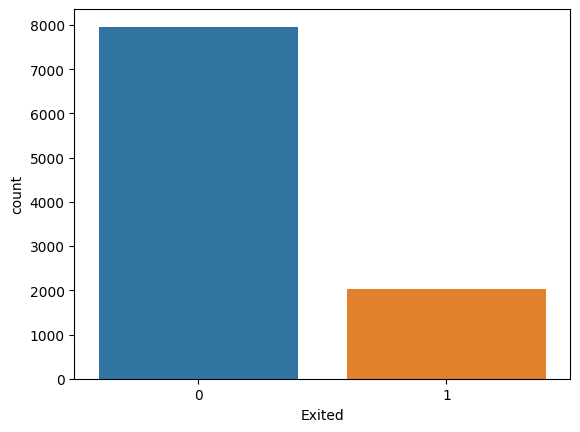

In [56]:
sns.countplot(x=y)

In [57]:
print(x.value_counts())
print(y.value_counts())

CreditScore  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary
350          39   0       109733.20  2              0          0               123602.11          1
695          34   9       0.00       2              1          1               67502.12           1
             28   5       171069.39  2              1          1               88689.40           1
             29   5       0.00       2              1          1               6770.44            1
                  9       0.00       2              1          0               111565.45          1
                                                                                                 ..
608          33   9       89968.69   1              1          0               68777.26           1
             34   3       106288.54  1              1          1               36639.25           1
                  4       88772.87   1              1          1               168822.01          1
     

# Over Sampling of values of features

In [62]:
ros=RandomOverSampler(random_state=0)
x_res, y_res=ros.fit_resample(x,y)
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

# Normalization and scaling

In [13]:
scaler=StandardScaler()

In [15]:
x_scaled=scaler.fit_transform(x_res)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [17]:
print(x_scaled)

[[-0.29877723  0.08418894 -1.01840607 ...  0.6512495   1.08223556
   0.00817382]
 [-0.4103938  -0.01032629 -1.36135608 ... -1.53550983  1.08223556
   0.20261687]
 [-1.48597169  0.08418894  1.03929402 ...  0.6512495  -0.92401325
   0.22674468]
 ...
 [-0.84671313  1.02934128  0.01044398 ...  0.6512495  -0.92401325
   1.28878188]
 [-0.96847667  0.65128034 -0.67545605 ... -1.53550983  1.08223556
  -1.21851316]
 [-1.5874413   0.74579558  1.03929402 ...  0.6512495   1.08223556
   1.42417217]]


# Spliting of data into train and test dataset

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_res,random_state=0,test_size=0.25)

In [68]:
print(x_yes.shape)
print(x_train.shape)
print(x_test.shape)

(15926, 8)
(11944, 8)
(3982, 8)


# Neural network-based classifier

In [69]:
ann=MLPClassifier(hidden_layer_sizes=(100,100,100),random_state=0,max_iter=100,activation='relu')
ann.fit(x_train,y_train)

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [70]:
y_pred=ann.predict(x_test)

In [71]:
y_test.value_counts()

1    2001
0    1981
Name: Exited, dtype: int64

# Checking performance of model

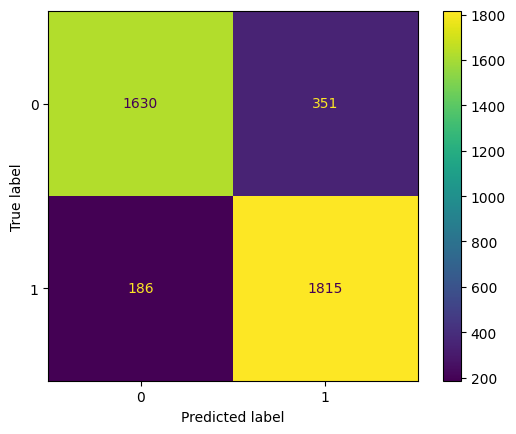

In [72]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1981
           1       0.84      0.91      0.87      2001

    accuracy                           0.87      3982
   macro avg       0.87      0.86      0.86      3982
weighted avg       0.87      0.87      0.86      3982

